In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')



In [2]:
# Define column names as per MovieLens format
columns = ['user_id', 'movie_id', 'rating', 'timestamp']

# Load ratings data
ratings_df = pd.read_csv('file.tsv', sep='\t', names=columns)
ratings_df.head()



,user_id,movie_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
# Load movie title mapping
movies_df = pd.read_csv('Movie_Id_Titles.csv')
movies_df.columns = ['movie_id', 'title']  # Rename columns for clarity
movies_df.head()


,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
# Merge movie titles with ratings
merged_df = pd.merge(ratings_df, movies_df, on='movie_id')
#merged_df['title'].value_counts().head(10)
#merged_df['title'].nunique()
merged_df.head()



,user_id,movie_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [5]:
# Average rating per movie
avg_ratings = merged_df.groupby('title')['rating'].mean().sort_values(ascending=False)
avg_ratings.head()


title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [6]:
# Number of ratings per movie
num_ratings = merged_df.groupby('title')['rating'].count().sort_values(ascending=False)
num_ratings.head()


title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [7]:
ratings_summary = pd.DataFrame(merged_df.groupby('title')['rating'].mean())
ratings_summary['num_ratings'] = merged_df.groupby('title')['rating'].count()
ratings_summary.head()


,rating,num_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


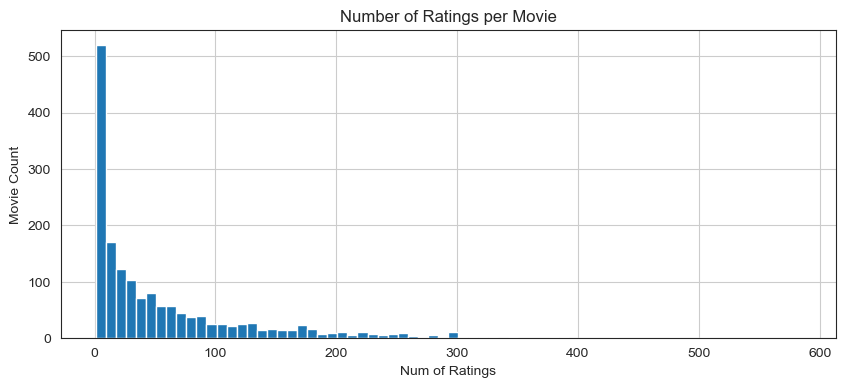

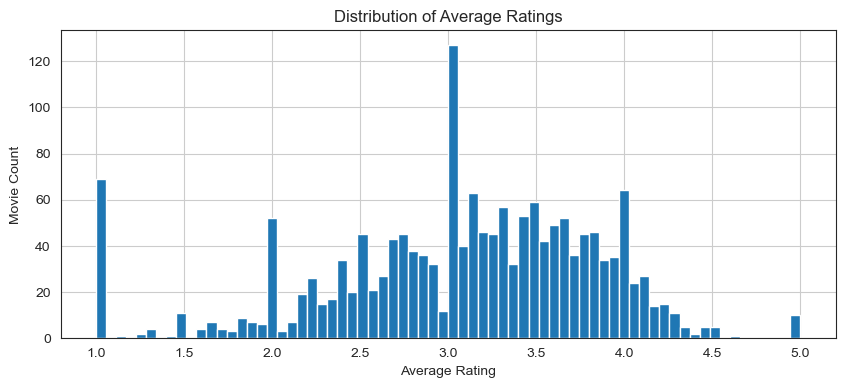

In [8]:
plt.figure(figsize=(10,4))
ratings_summary['num_ratings'].hist(bins=70)
plt.title("Number of Ratings per Movie")
plt.xlabel("Num of Ratings")
plt.ylabel("Movie Count")
plt.show()

plt.figure(figsize=(10,4))
ratings_summary['rating'].hist(bins=70)
plt.title("Distribution of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Movie Count")
plt.show()


In [9]:
# Pivot to create user-movie matrix
user_movie_matrix = merged_df.pivot_table(index='user_id', columns='title', values='rating')
user_movie_matrix.head()


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Ensure you have the required imports
import pandas as pd
import warnings

# Optional: suppress RuntimeWarnings for clean output
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Reference movies (make sure they exist in the DataFrame columns)
ref_movie_1 = '12 Angry Men (1957)'
ref_movie_2 = 'Toy Story (1995)'

# Make sure both movies exist in the user_movie_matrix
if ref_movie_1 in user_movie_matrix.columns and ref_movie_2 in user_movie_matrix.columns:
    matrix_ratings = user_movie_matrix[ref_movie_1]
    toystory_ratings = user_movie_matrix[ref_movie_2]

    # Compute correlations
    similar_to_matrix = user_movie_matrix.corrwith(matrix_ratings).dropna()
    similar_to_toystory = user_movie_matrix.corrwith(toystory_ratings).dropna()

    # Join with ratings summary for better filtering
    corr_matrix = pd.DataFrame(similar_to_matrix, columns=['Correlation'])
    corr_matrix = corr_matrix.join(ratings_summary['num_ratings'])
    filtered_matrix_corr = corr_matrix[corr_matrix['num_ratings'] > 100].sort_values('Correlation', ascending=False)

    corr_toystory = pd.DataFrame(similar_to_toystory, columns=['Correlation'])
    corr_toystory = corr_toystory.join(ratings_summary['num_ratings'])
    filtered_toystory_corr = corr_toystory[corr_toystory['num_ratings'] > 100].sort_values('Correlation', ascending=False)

    # Output top 10 similar movies
    print("Movies similar to 12 Angry Men:")
    print(filtered_matrix_corr.head(10))

    print("\nMovies similar to Toy Story:")
    print(filtered_toystory_corr.head(10))

else:
    print("One or both of the reference movies are not in the dataset.")




Movies similar to 12 Angry Men:
                                     Correlation  num_ratings
title                                                        
12 Angry Men (1957)                     1.000000          125
Ulee's Gold (1997)                      0.619544          184
Rear Window (1954)                      0.570513          209
Seven Years in Tibet (1997)             0.549939          155
Clerks (1994)                           0.528173          148
Singin' in the Rain (1952)              0.520844          137
Vertigo (1958)                          0.509460          179
Army of Darkness (1993)                 0.477251          116
Mr. Smith Goes to Washington (1939)     0.470078          105
First Wives Club, The (1996)            0.466773          160

Movies similar to Toy Story:
                               Correlation  num_ratings
title                                                  
Toy Story (1995)                  1.000000          452
Craft, The (1996)         

In [11]:
# Filter movies with more than 100 ratings
top_matrix_recommendations = corr_matrix[corr_matrix['num_ratings'] > 100].sort_values('Correlation', ascending=False)
top_matrix_recommendations.head()





,Correlation,num_ratings
title,,
12 Angry Men (1957),1.000000,125
Ulee's Gold (1997),0.619544,184
Rear Window (1954),0.570513,209
Seven Years in Tibet (1997),0.549939,155
Clerks (1994),0.528173,148
